# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sergio Eduardo Gutiérrez Torres

- ID: A01068505

- My carreer: ITC


# Importing libraries

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Ruta = "/content/drive/MyDrive/TC1002S_A01068505"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = Ruta + "/A01068505_X.csv"

dataset = pd.read_csv(url)

dataset

,Unnamed: 0,x1,x2,x3,x4
0,0,-1.334686,-1.908047,6.284575,-2.892182
1,1,7.936888,11.515777,0.107678,4.587010
2,2,8.429096,7.039822,-5.037469,0.552631
3,3,3.831683,-2.041746,-6.567382,4.306515
4,4,7.466875,10.028486,-6.168837,0.220805
...,...,...,...,...,...
398,398,7.337191,9.370760,-2.491400,2.010626
399,399,-1.480268,-1.438374,-6.919190,7.285102
400,400,6.498051,11.368432,-0.361451,0.097661
401,401,0.759423,-5.796179,6.225777,-4.460392


## A2 Data managment


Print the first 7 rows

In [ ]:
dataset.head(7)

,Unnamed: 0,x1,x2,x3,x4
0,0,-1.334686,-1.908047,6.284575,-2.892182
1,1,7.936888,11.515777,0.107678,4.587010
2,2,8.429096,7.039822,-5.037469,0.552631
3,3,3.831683,-2.041746,-6.567382,4.306515
4,4,7.466875,10.028486,-6.168837,0.220805
5,5,5.181330,6.585874,0.357071,-0.516770
6,6,-3.110261,-4.901386,6.232525,-5.039557


Print the last 4 rows

In [ ]:
dataset.tail(4)

,Unnamed: 0,x1,x2,x3,x4
399,399,-1.480268,-1.438374,-6.919190,7.285102
400,400,6.498051,11.368432,-0.361451,0.097661
401,401,0.759423,-5.796179,6.225777,-4.460392
402,402,8.455771,5.659713,-1.427643,0.223836


How many rows and columns are in your data?

Use the `shape` method


In [ ]:
dataset.shape

(403, 5)

Print the name of all columns

Use the `columns` method

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [ ]:
dataset.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1) 'Unnamed: 0':
"""
Esta primera columna nos representa una secuencia o cuenta de cada una de las
filas de datos, en la base de datos. Esta secuencia va de 0 a 402 y son única-
mente números enteros (int64) positivos.
"""
# 2) 'x1','x2','x3' y 'x4':
"""
Para cada una de estas columnas tenemos números de tipo decimal o flotante
(float64) que van desde negativos hasta positivos, en rangos variados en cada
columna 'x#'.
"""
# 3) Interpreatción Física
"""
Asimismo, no se posee suficiente información para lograr hacer una interpreta-
ción física del significado de los datos que se tienen en cada una de las colum-
nas de 'x#'.
"""
#...

Print a statistical summary of your columns


In [ ]:
dataset.describe()

,Unnamed: 0,x1,x2,x3,x4
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,201.000000,3.238558,1.935705,-1.434252,1.662672
std,116.480327,4.809408,5.267938,6.236635,3.465823
min,0.000000,-6.076969,-8.290313,-14.293215,-6.682413
25%,100.500000,-0.538737,-2.031375,-6.548913,-1.006170
50%,201.000000,1.881077,0.322212,-2.825882,1.158839
75%,301.500000,7.781909,7.041153,5.015475,4.394050
max,402.000000,13.171824,14.103366,11.147029,9.500323


In [ ]:
# 1) What is the minumum and maximum values of each variable
"""
'Unnamed: 0': MIN 0, MAX 402
'x1': MIN -6.076969, MAX 13.171824
'x2': MIN -8.290313, MAX 14.103366
'x3': MIN -14.293215, MAX 11.147029
'x4': MIN -6.682413, MAX 9.500323
"""
# 2) What is the mean and standar deviation of each variable
"""
'Unnamed: 0': MEAN 201, STD 116.480327
'x1': MEAN 3.238558, STD 4.809408
'x2': MEAN 1.935705, STD 5.267938
'x3': MEAN -1.434252, STD 6.236635
'x4': MEAN 1.662672, STD 3.465823
"""
# 3) What the 25%, 50% and 75% represent?
"""
De la totalidad de datos en la base ordenada de forma ascendente, el 25% repre-
senta el dato que se encuenta al cuarto del conjunto de datos de la columna, y
así el 50% es el dato de en medio (o mediana), y el 75% el que se encuentra a
los tres cuartos de recorrido.
"""

Rename the columns using the same name with capital letters

In [ ]:
"""
Para esto, primeramente se renombrará la columna 'Unnamed: 0' hacia 'sequence',
dada la interpretación expuesta anteriormente y dado que es un nombre más senci-
llo de identificar.
"""
# Rename 'Unnamed: 0'
dataset = dataset.rename(columns={"Unnamed: 0": "sequence"})

In [ ]:
dataset = dataset.rename(columns={"sequence": "SEQUENCE"})
dataset = dataset.rename(columns={"x1": "X1"})
dataset = dataset.rename(columns={"x2": "X2"})
dataset = dataset.rename(columns={"x3": "X3"})
dataset = dataset.rename(columns={"x4": "X4"})

dataset

,SEQUENCE,X1,X2,X3,X4
0,0,-1.334686,-1.908047,6.284575,-2.892182
1,1,7.936888,11.515777,0.107678,4.587010
2,2,8.429096,7.039822,-5.037469,0.552631
3,3,3.831683,-2.041746,-6.567382,4.306515
4,4,7.466875,10.028486,-6.168837,0.220805
...,...,...,...,...,...
398,398,7.337191,9.370760,-2.491400,2.010626
399,399,-1.480268,-1.438374,-6.919190,7.285102
400,400,6.498051,11.368432,-0.361451,0.097661
401,401,0.759423,-5.796179,6.225777,-4.460392


Rename the columns to their original names

In [ ]:
dataset = dataset.rename(columns={"SEQUENCE": "sequence"})
dataset = dataset.rename(columns={"X1": "x1"})
dataset = dataset.rename(columns={"X2": "x2"})
dataset = dataset.rename(columns={"X3": "x3"})
dataset = dataset.rename(columns={"X4": "x4"})

dataset

,sequence,x1,x2,x3,x4
0,0,-1.334686,-1.908047,6.284575,-2.892182
1,1,7.936888,11.515777,0.107678,4.587010
2,2,8.429096,7.039822,-5.037469,0.552631
3,3,3.831683,-2.041746,-6.567382,4.306515
4,4,7.466875,10.028486,-6.168837,0.220805
...,...,...,...,...,...
398,398,7.337191,9.370760,-2.491400,2.010626
399,399,-1.480268,-1.438374,-6.919190,7.285102
400,400,6.498051,11.368432,-0.361451,0.097661
401,401,0.759423,-5.796179,6.225777,-4.460392


Use two different alternatives to get one of the columns

In [ ]:
dataset['x1']

0     -1.334686
1      7.936888
2      8.429096
3      3.831683
4      7.466875
         ...   
398    7.337191
399   -1.480268
400    6.498051
401    0.759423
402    8.455771
Name: x1, Length: 403, dtype: float64

In [ ]:
dataset.x1

0     -1.334686
1      7.936888
2      8.429096
3      3.831683
4      7.466875
         ...   
398    7.337191
399   -1.480268
400    6.498051
401    0.759423
402    8.455771
Name: x1, Length: 403, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [ ]:
"""
Columna 1: sequence
Columna 2: x1        <--
Columna 3: x2        <--
Columna 4: x3
Columna 5: x4
"""
dataset.loc[62:72, ["x1", "x2"]]

,x1,x2
62,8.099944,8.976737
63,-2.646469,-4.307263
64,-4.159936,-3.647984
65,0.931366,0.053317
66,-2.536010,-2.153341
67,6.243142,8.515870
68,2.453215,1.062881
69,11.505948,9.493228
70,1.979949,-3.269954
71,9.467230,12.753312


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [ ]:
n = dataset.x1.isnull().sum()
print(n)

nn = dataset.x1.notnull().sum()
print(nn)

count = dataset.x1.count()
sum = n + nn

if sum != count :
  print("La suma es desigual: ", sum, " contra ", count)
else:
  print("La suma es igual: ", sum, " contra ", count)

0
403
La suma es igual:  403  contra  403


In [ ]:
n = dataset.x2.isnull().sum()
print(n)

nn = dataset.x2.notnull().sum()
print(nn)

count = dataset.x2.count()
sum = n + nn

if sum != count :
  print("La suma es desigual: ", sum, " contra ", count)
else:
  print("La suma es igual: ", sum, " contra ", count)

0
403
La suma es igual:  403  contra  403


Discard the last column


In [ ]:
dataset.drop("x4", axis = 1, inplace = True)

dataset

,sequence,x1,x2,x3
0,0,-1.334686,-1.908047,6.284575
1,1,7.936888,11.515777,0.107678
2,2,8.429096,7.039822,-5.037469
3,3,3.831683,-2.041746,-6.567382
4,4,7.466875,10.028486,-6.168837
...,...,...,...,...
398,398,7.337191,9.370760,-2.491400
399,399,-1.480268,-1.438374,-6.919190
400,400,6.498051,11.368432,-0.361451
401,401,0.759423,-5.796179,6.225777


### Questions

Based on the previos results, provide a description of your dataset

Your response:

A el presente punto de la actividad, se tiene una base de datos que cuenta con cuatro columnas: sequence, x1, x2 y x3; todas de las cuales poseen un total de 403 entradas.

La columna 'sequence' representa el número de fila en la que te encuentras en la base de datos, siendo que va de 0 a 402 y solo posee números enteros positivos. Las columnas 'x1', 'x2' y 'x3' poseen números decimales o flotantes que van del negativo al positivo, y que no se les puede dar una interpretación física de qué representan dada la falta de información o contexto.

Asimismo, se muestra que dos columnas de datos ('x1' y 'x2') no poseen ningún dato faltante, por lo que se puede llegar a la inferencia de que la base de datos fue realizada a conciencia descartando cualquier tipo de dato o registro inacabado y posee información completa.

## A3 Data visualization

Plot in the same figure the histogram of two variables



<Axes: ylabel='Count'>

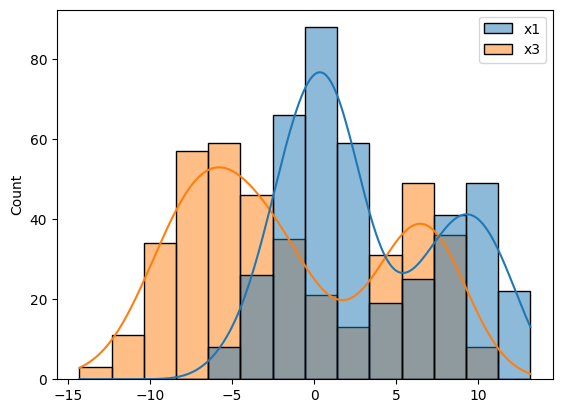

In [ ]:
dataset_2plot = dataset[["x1","x3"]]


sns.histplot(dataset_2plot, kde=True)

Based on these plots, provide a description of your data:

Your response here:

Se trata de dos conjuntos de datos que juntos se encuentran en un rango de valores aproximado entre -15 y 15 (en eje de las "X's"), y en rango de cantidad aproximado de 0 hasta 90 (en eje de las "Y's") . Asimismo, en la gráfica se puede observar que tanto 'x1' y 'x3' tienen muestreos o comportamientos muy similares entre ellos, sin embargo, ya en la práfica sus tendencias se encuentran "desfasadas" a pesar de ser similares.

Asimismo, se puede observar que mientras 'x1' llega a cantidades del mismo dato significativamente más altas que 'x3', este último tiene un rango de valores más amplio que su contraparte.

Plot in the same figure the boxplot of two variables

<Axes: >

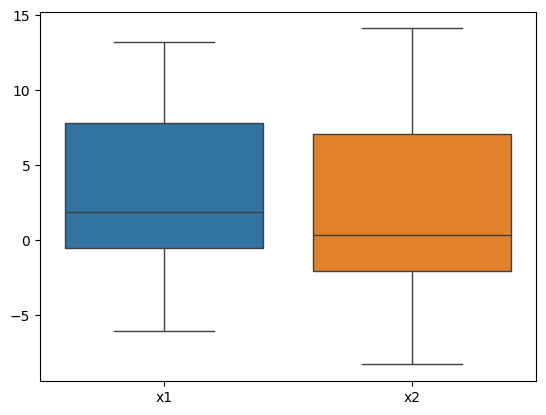

In [ ]:
dataset_2boxplot = dataset[["x1","x2"]]

sns.boxplot(dataset_2boxplot)

Plot the scatter plot of two variables

<Axes: xlabel='x2', ylabel='x3'>

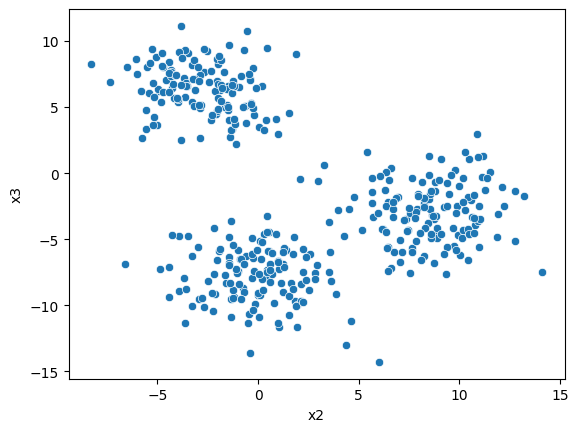

In [ ]:
sns.scatterplot(data=dataset, x="x2", y="x3")

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:

- BOXPLOT:

Este fue realizado entre las variables 'x1' y 'x2', y en cuyo boxplot realmente no se encuentra una diferencia muy significativa entre ambos conjuntos de datos, se encuentran prácticamente dentro de los mismos rangos, y practicamente con la misma frecuencia.

- SCATTERPLOT:

Por el otro lado, el scatterplot realizado entre 'x2' y 'x3' nos deja ver una organización interesante en los datos, en donde se alcanzan a identificar tres grupos bien en los que se podrían clasificar los datos, los cuales se perciben proporcionalmente distribuidos y casi no poseen datos remotos o muy alejados de los posibles centros de los grupos.

## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [148]:
dataset.drop("sequence", axis=1, inplace=True)

K = 3

km = KMeans(n_clusters=K, n_init="auto")

yestimated = km.fit_predict(dataset[['x2','x3']])

yestimated

array([1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1,
       1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 0,
       0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1,

Add to your dataset a column with the estimated cluster to each data point

In [149]:
dataset['yestimated'] = yestimated

dataset

,x1,x2,x3,yestimated
0,-1.334686,-1.908047,6.284575,1
1,7.936888,11.515777,0.107678,0
2,8.429096,7.039822,-5.037469,0
3,3.831683,-2.041746,-6.567382,2
4,7.466875,10.028486,-6.168837,0
...,...,...,...,...
398,7.337191,9.370760,-2.491400,0
399,-1.480268,-1.438374,-6.919190,2
400,6.498051,11.368432,-0.361451,0
401,0.759423,-5.796179,6.225777,1


Print the number associated to each cluster

In [150]:
dataset.yestimated.unique()

array([1, 0, 2], dtype=int32)

Print the centroids

In [151]:
km.cluster_centers_

array([[ 8.49766108, -2.93853197],
       [-2.75254899,  6.39085104],
       [-0.11552227, -7.81665653]])

Print the intertia metric

In [152]:
km.inertia_

3500.0485500658706

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

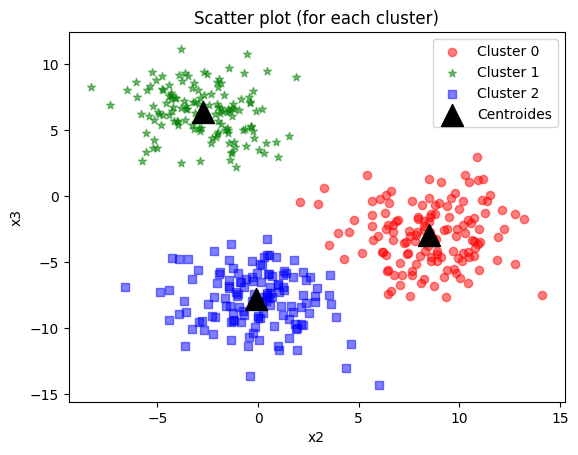

In [153]:
# Get a dataframe with the data of each clsuter
dataset1 = dataset[dataset.yestimated==0]
dataset2 = dataset[dataset.yestimated==1]
dataset3 = dataset[dataset.yestimated==2]

# Scatter plot of each cluster
plt.scatter(dataset1.x2, dataset1.x3, label='Cluster 0', c='r', marker='o', s=35, alpha=0.5)
plt.scatter(dataset2.x2, dataset2.x3, label='Cluster 1', c='g', marker='*', s=35, alpha=0.5)
plt.scatter(dataset3.x2, dataset3.x3, label='Cluster 2', c='b', marker='s', s=35, alpha=0.5)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='^', label='Centroides', s=250)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x2')
plt.ylabel('x3')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

Para el presente "Kmeans", se tomaron en cuenta las variables 'x2' y 'x3' que se utilizaron para realizar el scatter plot del apartado anterior, y en cuyo momento fueron definidas de manera arbitriria, aunque resultando por mostrar una distribución gráfica visualmente muy representativa del objetivo de este ejercicio.

El resultado del scatter plot para la estimación de clusters se muestra muy acorde a las predicciones, contando con tres grupos de datos bien proporcionados y con muy pocos de estos estando muy alejados de los centroides de cada cluster; logrando al final una representación, a mi parecer, muy acorde a la totalidad de la base de datos.

## A5 Elbow plot

Compute the Elbow plot

In [156]:
# sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit_predict(dataset[['x2','x3']])
    sse.append(km.inertia_)

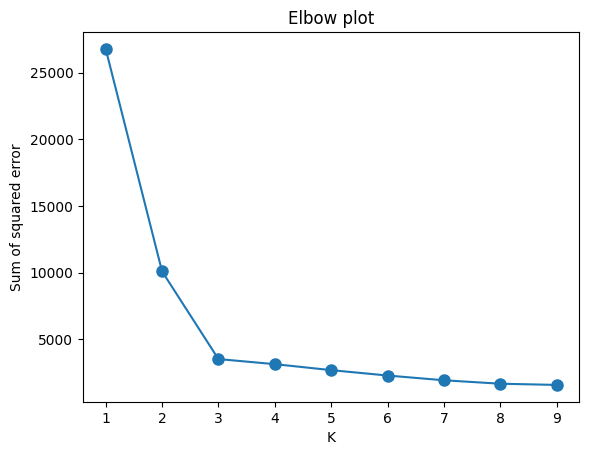

In [157]:
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

- What is the best number of clusters K? (argue your response)

Your response:

Como se alcanza a apreciar en la presente representación gráfica, el número más óptimo para el valor de K sería 3, esto porque en éste es en donde se encuentra el punto de inflexión del gráfico, en donde cambia su pendiente bruscamente, y por lo tanto, no tiende a cambiar tanto de ahí en adelante.

- Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

Como se alcanzó a apreciar en el scatter plot del paratado anterior, esta gráfica nos demostró una adecuada organización de los datos en los tres grupos distintos para la representación de la base de datos; lo cual fue la predicción dada al inicio.

# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

In [ ]:
"""
Gracias al presente curso por semana TEC, logré un nivel de comprensión bastante
alto acerca de las identificación, interpretación y detección de uso de cada una
de las distintas variables que se pudieran llegar a presentar en una situación o
problema, y cómo es que estas se relacionan entre sí para dar contexto y funda-
mento al motivo de la información recopilada de algún fenómeno o acontecimiento.

Por último, todo desencadenando en una serie de procesos de desarrollo y/o aná-
lisis para dar solución a la problemática en cuestión.
"""

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

In [ ]:
"""
El presente curso, a pesar de contar con una duración únicamente de una semana,
me ayudó a lograr un panorama bastante completo acerca de lo que constituye el
análisis e interpretación de datos, culminando por la construcción de algún
modelo de tipo bivariados, para dar solución a una problemática que se llegue a
presentar, como lo pueden ser algún fenómeno físico.
"""